In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import env
import os
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from pydataset import data

In [24]:
from env import host, user, password

In [25]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.
<ul>
<li>print the first 3 rows
<li>print the number of rows and columns (shape)
<li>print the column names
<li>print the data type of each column
<li>print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?</ul>

In [29]:
iris = pd.read_sql('SELECT * FROM measurements JOIN species as species_name on species_id', get_connection('iris_db'))



OperationalError: (pymysql.err.OperationalError) (1052, "Column 'species_id' in on clause is ambiguous")
[SQL: SELECT * FROM measurements JOIN species as species_name on species_id]
(Background on this error at: http://sqlalche.me/e/e3q8)

In [8]:
iris.to_csv('iris.csv')

In [25]:
def get_iris_data():
    filename = "iris.csv"
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        # read the SQL query into a dataframe
        df = pd.read_sql('SELECT * FROM measuresments', get_connection('iris_db'))

        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_file(filename)

        # Return the dataframe to the calling code
        return df  

In [13]:
df_iris = pd.read_csv('iris.csv', index_col=0)
df_iris.head(3)

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1


In [15]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   measurement_id  150 non-null    int64  
 1   sepal_length    150 non-null    float64
 2   sepal_width     150 non-null    float64
 3   petal_length    150 non-null    float64
 4   petal_width     150 non-null    float64
 5   species_id      150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 8.2 KB


In [16]:
for col in df_iris.columns: 
    print(col) 

measurement_id
sepal_length
sepal_width
petal_length
petal_width
species_id


In [19]:
df_iris.dtypes
#based off the data types i would convert the measurement and species id from an integer to a float

measurement_id      int64
sepal_length      float64
sepal_width       float64
petal_length      float64
petal_width       float64
species_id          int64
dtype: object

Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.
<ol>
<li> assign the first 100 rows to a new dataframe, df_excel_sample
<li>print the number of rows of your original dataframe
<li>print the first 5 column names
<li>print the column names that have a data type of object
<li>compute the range for each of the numeric variables.
    </ol>

In [29]:
excel_df = pd.read_csv('telco.csv', index_col=0)
excel_df.head(100)

,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
customer_id,,,,,,,,,,,
0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,593.30,No
0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,542.40,No
0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,280.85,Yes
0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes
0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes
0013-MHZWF,Female,0,No,Yes,1,1,0,Credit card (automatic),69.40,571.45,No
0013-SMEOE,Female,1,Yes,No,1,2,2,Bank transfer (automatic),109.70,7904.25,No
0014-BMAQU,Male,0,Yes,No,2,2,2,Credit card (automatic),84.65,5377.80,No
0015-UOCOJ,Female,1,No,No,1,1,0,Electronic check,48.20,340.35,No


In [22]:
titanic=pd.read_sql('SELECT * FROM passengers', get_connection('titanic_db'))

In [23]:
titanic.to_csv('titanic.csv')

In [26]:
def get_titanic_data():
    filename = "titanic.csv"
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        # read the SQL query into a dataframe
        df = pd.read_sql('SELECT * FROM passengers', get_connection('titanic_db'))

        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_file(filename)

        # Return the dataframe to the calling code
        return df  

Iris Data
<ol style="list-style-type:lower-alpha">
<li>Use the function defined in acquire.py to load the iris data.</li>
<li>Drop the species_id and measurement_id columns.</li>
<li>Rename the species_name column to just species. </li>
<li>Create dummy variables of the species name.</li>
<li>Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.</li> </ol>

In [38]:
# Use the function defined in acquire.py to load the iris data.
import acquire
iris = acquire.get_iris_data()
iris.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_id.1,species_name
0,1,5.1,3.5,1.4,0.2,1,1,setosa
1,2,4.9,3.0,1.4,0.2,1,1,setosa
2,3,4.7,3.2,1.3,0.2,1,1,setosa
3,4,4.6,3.1,1.5,0.2,1,1,setosa
4,5,5.0,3.6,1.4,0.2,1,1,setosa


In [39]:
# Drop the species_id and measurement_id columns.
cols_to_drop = ['species_id', 'measurement_id']
iris = iris.drop(columns=cols_to_drop)

In [13]:
iris.columns

Index(['Unnamed: 0', 'sepal_length', 'sepal_width', 'petal_length',
       'petal_width'],
      dtype='object')

In [50]:
# Rename the species_name column to just species.
iris= iris.rename(columns={'species_name': 'species'})
iris=iris.rename(columns={'species_id.1': 'speciesid'})
iris

,sepal_length,sepal_width,petal_length,petal_width,speciesid,species
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa
5,5.4,3.9,1.7,0.4,1,setosa
6,4.6,3.4,1.4,0.3,1,setosa
7,5.0,3.4,1.5,0.2,1,setosa
8,4.4,2.9,1.4,0.2,1,setosa
9,4.9,3.1,1.5,0.1,1,setosa


In [55]:
# Create dummy variables of the species name.
iris.species.value_counts()
iris_dummies = pd.get_dummies(iris[['species']], drop_first=[True, True])
iris = pd.concat([iris, iris_dummies], axis=1)
iris

,sepal_length,sepal_width,petal_length,petal_width,speciesid,species,species_versicolor,species_virginica,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,setosa,0,0,0,0
1,4.9,3.0,1.4,0.2,1,setosa,0,0,0,0
2,4.7,3.2,1.3,0.2,1,setosa,0,0,0,0
3,4.6,3.1,1.5,0.2,1,setosa,0,0,0,0
4,5.0,3.6,1.4,0.2,1,setosa,0,0,0,0
5,5.4,3.9,1.7,0.4,1,setosa,0,0,0,0
6,4.6,3.4,1.4,0.3,1,setosa,0,0,0,0
7,5.0,3.4,1.5,0.2,1,setosa,0,0,0,0
8,4.4,2.9,1.4,0.2,1,setosa,0,0,0,0
9,4.9,3.1,1.5,0.1,1,setosa,0,0,0,0


Titanic Data
<ol style="list-style-type:lower-alpha", font= "rockwell">
<li>Use the function you defined in acquire.py to load the titanic data set.</li>
<li>Handle the missing values in the embark_town and embarked columns.</li>
<li>Remove the deck column.</li>
<li>Create a dummy variable of the embarked column.</li>
<li>Scale the age and fare columns using a min max scaler. Why might this be beneficial? When might you not want to do this?</li>
<li>Fill the missing values in age. The way you fill these values is up to you. Consider the tradeoffs of different methods.</li>
<li>Create a function named prep_titanic that accepts the untransformed titanic data, and returns the data with the transformations above applied.</li> </ol>

In [19]:
titanic= acquire.get_titanic_data()
titanic.head(1)

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.25,S,Third,NaN,Southampton,0


In [33]:
def drop_cols_with_50pct_null(titanic):
    # create series with percent missing
    missing_vals = titanic.isnull().sum()/len(df)*100
    # identify the columns to drop
    cols_to_drop = [missing_vals[missing_vals>50].index[0]]
    df = titanic.drop(columns=cols_to_drop)
    return titanic
#type(missing_vals)

In [37]:
titanic.isnull().sum()

Unnamed: 0        0
passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
dtype: int64

Exercises
<ol>
Continue in your classification_exercises.ipynb notebook. Use the iris dataset. As always, add, commit, and push your changes.

<li>Split your data into train, test, and validate samples.</li> 

<li>Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis is the measure. Add another dimension using color to represent species. Document takeaways from this visualization. </li> 

<li>Create 4 subplots (2 rows x 2 columns) of scatterplots.
<ul>
<li> sepal_length x sepal_width</li> 
<li> petal_length x petal_width</li> 
<li> sepal_area x petal_area</li> 
<li> sepal_length x petal_length</li> 
<li> What are your takeaways?</li> 
    </ul>
<li> Create a heatmap of each variable layering correlation coefficient on top.</li> 

<li> Create a scatter matrix visualizing the interaction of each variable </li> 

<li> Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this.</li> 

<li> Make sure to include a null hypothesis, alternative hypothesis, results, and summary.</li> 

<li> What is your takeaway from this statistical testing?</li> 

<li> Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.</li> 

In [18]:
iris= pd.read_csv("iris.csv")
iris= iris.assign(sepal_area=(iris.sepal_width * iris. sepal_length))
iris= iris.assign(petal_area=(iris.petal_width * iris. petal_length))
iris= iris.assign(total_area=(iris.sepal_area + iris. petal_area))
iris= iris.drop(columns=['species_id', 'species_id.1', 'measurement_id'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name,sepal_area,petal_area,total_area
0,5.1,3.5,1.4,0.2,setosa,17.85,0.28,18.13
1,4.9,3.0,1.4,0.2,setosa,14.70,0.28,14.98
2,4.7,3.2,1.3,0.2,setosa,15.04,0.26,15.30
3,4.6,3.1,1.5,0.2,setosa,14.26,0.30,14.56
4,5.0,3.6,1.4,0.2,setosa,18.00,0.28,18.28


In [22]:
train, test = train_test_split(iris, test_size=.2, random_state=123, stratify=iris.species_name)
train, validate = train_test_split(iris, test_size=.3, random_state=123, stratify=iris.species_name)
train.head()


,sepal_length,sepal_width,petal_length,petal_width,species_name,sepal_area,petal_area,total_area
80,5.5,2.4,3.8,1.1,versicolor,13.20,4.18,17.38
45,4.8,3.0,1.4,0.3,setosa,14.40,0.42,14.82
144,6.7,3.3,5.7,2.5,virginica,22.11,14.25,36.36
110,6.5,3.2,5.1,2.0,virginica,20.80,10.20,31.00
38,4.4,3.0,1.3,0.2,setosa,13.20,0.26,13.46


In [23]:
test.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name,sepal_area,petal_area,total_area
80,5.5,2.4,3.8,1.1,versicolor,13.20,4.18,17.38
45,4.8,3.0,1.4,0.3,setosa,14.40,0.42,14.82
144,6.7,3.3,5.7,2.5,virginica,22.11,14.25,36.36
110,6.5,3.2,5.1,2.0,virginica,20.80,10.20,31.00
38,4.4,3.0,1.3,0.2,setosa,13.20,0.26,13.46


In [24]:
validate.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name,sepal_area,petal_area,total_area
72,6.3,2.5,4.9,1.5,versicolor,15.75,7.35,23.10
125,7.2,3.2,6.0,1.8,virginica,23.04,10.80,33.84
80,5.5,2.4,3.8,1.1,versicolor,13.20,4.18,17.38
86,6.7,3.1,4.7,1.5,versicolor,20.77,7.05,27.82
117,7.7,3.8,6.7,2.2,virginica,29.26,14.74,44.00


In [25]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name,sepal_area,petal_area,total_area
60,5.0,2.0,3.5,1.0,versicolor,10.00,3.50,13.50
16,5.4,3.9,1.3,0.4,setosa,21.06,0.52,21.58
88,5.6,3.0,4.1,1.3,versicolor,16.80,5.33,22.13
130,7.4,2.8,6.1,1.9,virginica,20.72,11.59,32.31
6,4.6,3.4,1.4,0.3,setosa,15.64,0.42,16.06


In [26]:
iris_melted = iris.melt()
iris_melted

,variable,value
0,sepal_length,5.1
1,sepal_length,4.9
2,sepal_length,4.7
3,sepal_length,4.6
4,sepal_length,5
...,...,...
1195,total_area,32.06
1196,total_area,25.25
1197,total_area,29.9
1198,total_area,33.5


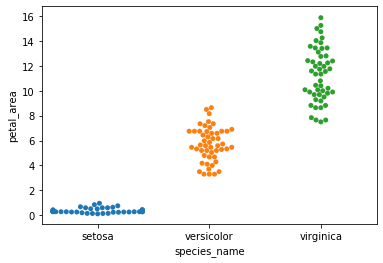

In [28]:
sns.swarmplot(x='species_name', y='petal_area', data=iris)

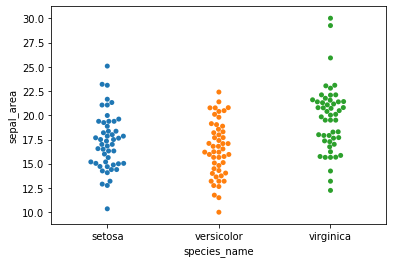

In [29]:
sns.swarmplot(x='species_name', y='sepal_area', data=iris)

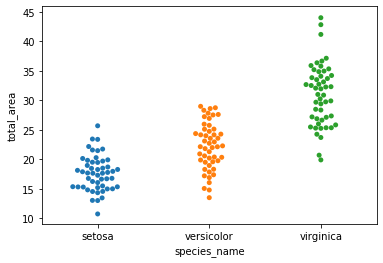

In [30]:
sns.swarmplot(x='species_name', y='total_area', data=iris)

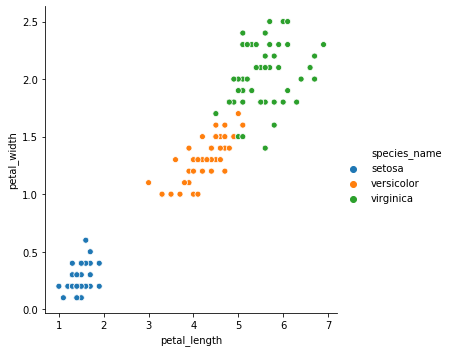

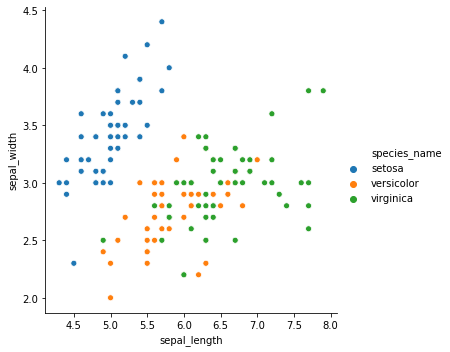

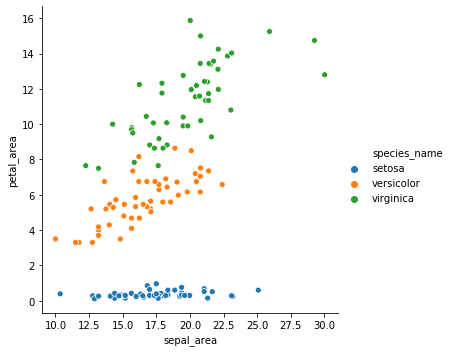

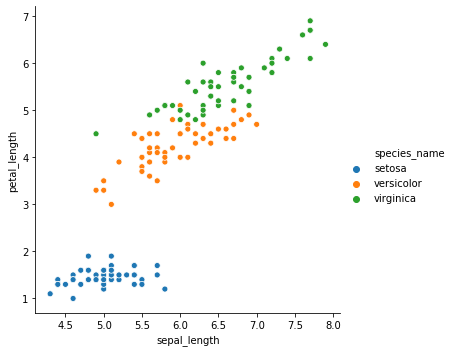

In [31]:
sns.relplot(x='petal_length', y='petal_width', hue="species_name",data=iris)
sns.relplot(x='sepal_length', y='sepal_width', hue="species_name",data=iris)
sns.relplot(x='sepal_area', y='petal_area', hue="species_name",data=iris)
sns.relplot(x='sepal_length', y='petal_length', hue="species_name",data=iris)

In [ ]:
sns.relplot(x='petal_length', y='petal_width', col='species_name', data=iris)
sns.relplot(x='sepal_length', y='sepal_width', col='species_name', data=iris)
sns.relplot(x='sepal_area', y='petal_area', col='species_name', data=iris)
sns.relplot(x='sepal_length', y='petal_length', col='species_name', data=iris)